In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_final = pd.read_csv("Xdf_final.csv")
df_final.head(5)

,Unnamed: 0,code,creator,created_datetime,last_modified_datetime,product_name,quantity,brands,categories_en,labels_en,...,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0,00000000000000225,nutrinet-sante,2021-06-16T14:53:28Z,2021-06-16T14:53:29Z,jeunes pousses,NaN,endives,NaN,NaN,...,12.0,1569.0,7.0,3.08,70.1,15.0,1.4,7.8,1.40,0.560
1,1,0000000000017,kiliweb,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,...,12.0,685.8,1.9,1.00,17.0,4.1,1.4,15.3,1.10,0.440
2,2,0000000000031,isagoofy,2018-10-13T21:06:14Z,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,NaN,...,12.0,3661.0,15.1,6.10,2.6,1.0,1.4,15.7,2.10,0.840
3,3,000000000003327986,kiliweb,2019-11-19T15:02:16Z,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,...,18.0,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840
4,4,000000000004622327,kiliweb,2021-04-27T05:38:15Z,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,...,12.0,88.0,0.0,0.00,4.8,0.4,1.4,0.2,2.04,0.816


In [3]:
df_final = df_final.drop("Unnamed: 0", axis = 1)
df_final.head(5)

,code,creator,created_datetime,last_modified_datetime,product_name,quantity,brands,categories_en,labels_en,countries_en,...,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,00000000000000225,nutrinet-sante,2021-06-16T14:53:28Z,2021-06-16T14:53:29Z,jeunes pousses,NaN,endives,NaN,NaN,France,...,12.0,1569.0,7.0,3.08,70.1,15.0,1.4,7.8,1.40,0.560
1,0000000000017,kiliweb,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,France,...,12.0,685.8,1.9,1.00,17.0,4.1,1.4,15.3,1.10,0.440
2,0000000000031,isagoofy,2018-10-13T21:06:14Z,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,NaN,France,...,12.0,3661.0,15.1,6.10,2.6,1.0,1.4,15.7,2.10,0.840
3,000000000003327986,kiliweb,2019-11-19T15:02:16Z,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,Spain,...,18.0,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840
4,000000000004622327,kiliweb,2021-04-27T05:38:15Z,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,Spain,...,12.0,88.0,0.0,0.00,4.8,0.4,1.4,0.2,2.04,0.816


In [4]:
df_final.dtypes

code                       object
creator                    object
created_datetime           object
last_modified_datetime     object
product_name               object
quantity                   object
brands                     object
categories_en              object
labels_en                  object
countries_en               object
additives_en               object
nutriscore_grade           object
pnns_groups_1              object
pnns_groups_2              object
states_en                  object
main_category              object
main_category_en           object
nutriscore_score          float64
energy_100g               float64
fat_100g                  float64
saturated-fat_100g        float64
carbohydrates_100g        float64
sugars_100g               float64
fiber_100g                float64
proteins_100g             float64
salt_100g                 float64
sodium_100g               float64
dtype: object

# Relation entre variables quantitatives et variables quanlitatives

### Reletation entre la france est les variables

Nous allons faire un système de filtrage avec les pays et faire la suite de notre analyse avec la France

In [5]:
data_france = df_final.loc[df_final['countries_en'] == "France"]
data_france.sample(5)

,code,creator,created_datetime,last_modified_datetime,product_name,quantity,brands,categories_en,labels_en,countries_en,...,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
490936,3259426036422,openfoodfacts-contributors,2016-10-11T14:42:44Z,2020-02-26T23:07:00Z,Mon Gâteau Saveur Vanille,350 g,Ker Cadélac,"snacks,sweet snacks,biscuits and cakes,cakes","No palm oil,Produced in Brittany",France,...,17.0,1749.0,34.000000,26.000000,0.000000,0.000000,1.4,28.000000,1.600000,0.640000
195117,0201307012790,kiliweb,2019-12-31T09:49:53Z,2019-12-31T10:02:35Z,Assortiement mini viennoiserie,NaN,NaN,NaN,NaN,France,...,10.0,1029.0,10.000000,4.620000,29.230000,2.310000,1.5,10.000000,0.942500,0.377000
330898,2000000024716,phoenix,2015-11-29T13:39:39Z,2015-11-29T15:40:56Z,Chicken Dips,72 g (x 4),Quick,"meats,meat preparations,poultries,breaded prod...",NaN,France,...,12.0,1138.0,10.294118,5.514706,31.617647,1.470588,1.4,13.235294,1.001838,0.400735
173260,0085200000265,kiliweb,2019-08-07T18:47:55Z,2019-08-07T18:47:55Z,Chardonnay,NaN,NaN,NaN,NaN,France,...,15.0,1347.0,15.250000,6.780000,44.070000,0.000000,0.4,3.390000,1.145000,0.458000
257193,0733894323039,openfoodfacts-contributors,2020-10-15T22:08:10Z,2020-10-15T22:25:28Z,Spekkoek,365g,Morisca,"biscuits and cakes,cakes",NaN,France,...,12.0,1410.0,28.000000,20.000000,1.300000,0.200000,1.4,19.000000,1.200000,0.480000


In [6]:
# La forme du nouveau dataset
data_france.shape

(480662, 27)

### Distribution des variables nutritionnelles" par catégories pnns_groups_1"

### Relation entre nos variables qualitatives

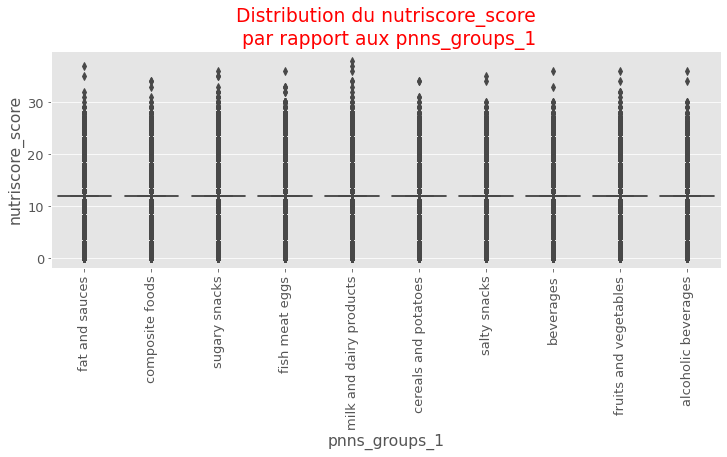

In [7]:
# Distribution du nutriscore par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="pnns_groups_1", y= "nutriscore_score",showfliers = True, data=data_france[data_france["pnns_groups_1"]!="unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("nutriscore_score")
plt.title("Distribution du nutriscore_score" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

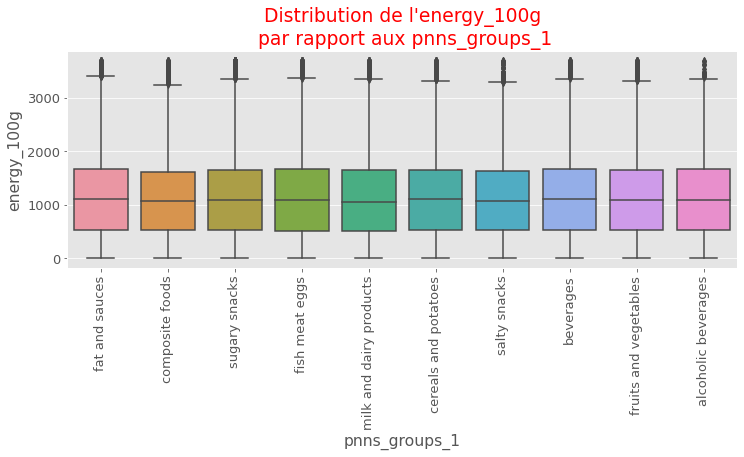

In [8]:
# Distribution de l'energy_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_1", y = "energy_100g", showfliers = True, data = data_france[data_france["pnns_groups_1"] != "unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("energy_100g")
plt.title("Distribution de l'energy_100g" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

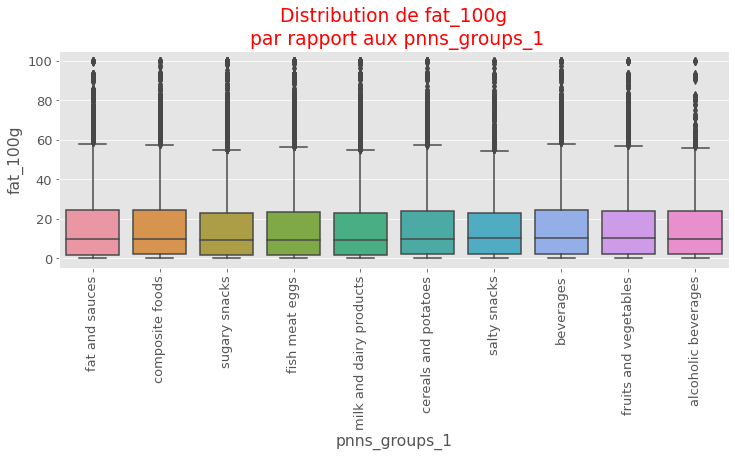

In [9]:
# Distribution de fat_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_1", y = "fat_100g", showfliers = True, data = data_france[data_france["pnns_groups_1"] != "unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("fat_100g")
plt.title("Distribution de fat_100g" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

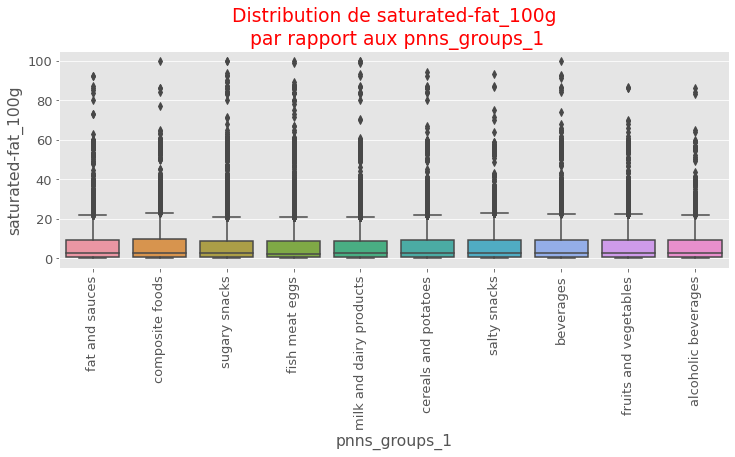

In [10]:
# Distribution de saturated-fat_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_1", y = "saturated-fat_100g", showfliers = True, data = data_france[data_france["pnns_groups_1"] != "unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("saturated-fat_100g")
plt.title("Distribution de saturated-fat_100g" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

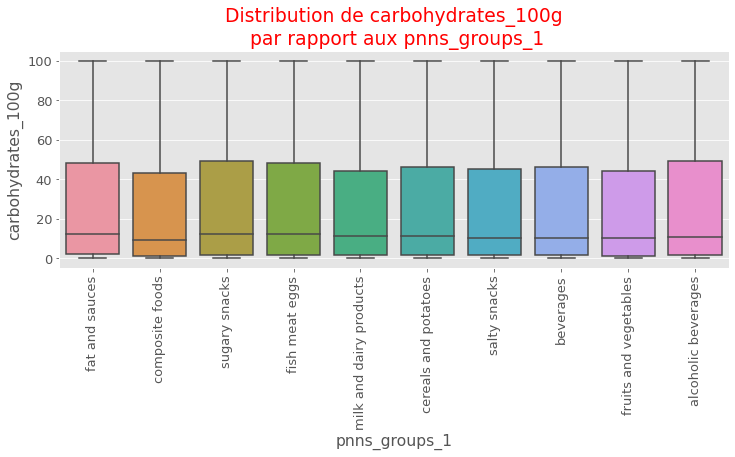

In [11]:
# Distribution de carbohydrates_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_1", y = "carbohydrates_100g", showfliers = True, data =data_france[data_france["pnns_groups_1"] != "unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("carbohydrates_100g")
plt.title("Distribution de carbohydrates_100g" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

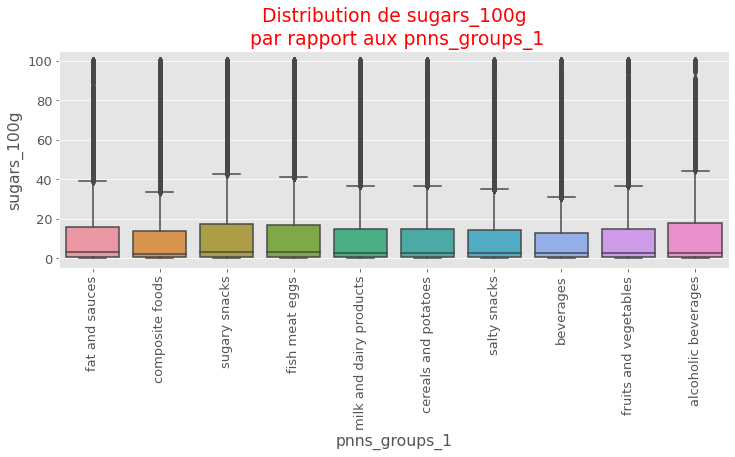

In [12]:
# Distribution de sugars_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_1", y = "sugars_100g", showfliers = True, data = data_france[data_france["pnns_groups_1"] != "unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("sugars_100g")
plt.title("Distribution de sugars_100g" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

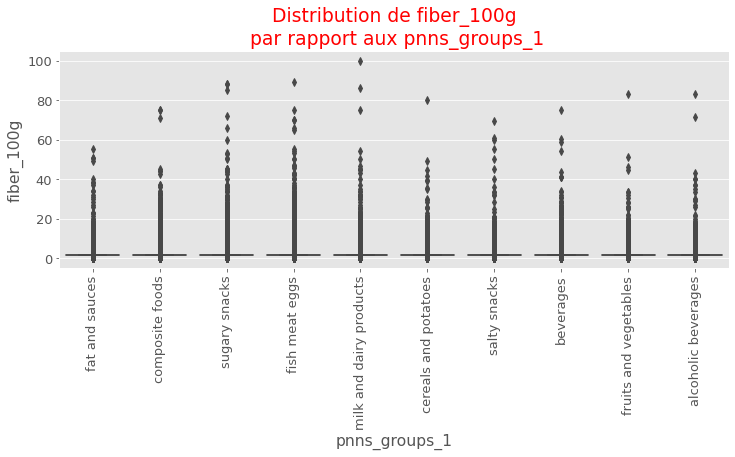

In [13]:
# Distribution de fiber_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_1", y = "fiber_100g", showfliers = True, data = data_france[data_france["pnns_groups_1"] != "unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("fiber_100g")
plt.title("Distribution de fiber_100g" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

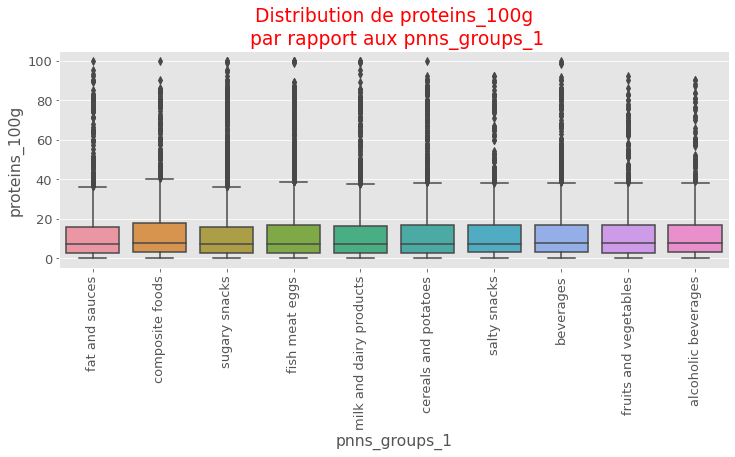

In [14]:
# Distribution de proteins_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_1", y = "proteins_100g", showfliers = True, data =data_france[data_france["pnns_groups_1"] != "unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("proteins_100g")
plt.title("Distribution de proteins_100g" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

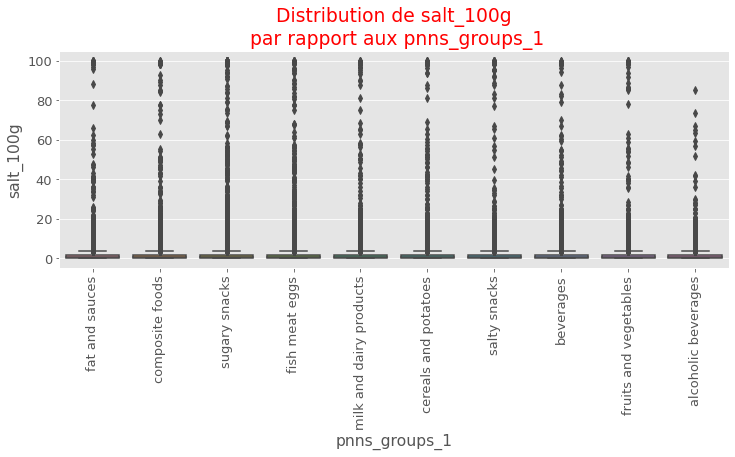

In [15]:
# Distribution de salt_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_1", y = "salt_100g", showfliers = True, data = data_france[data_france["pnns_groups_1"] != "unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("salt_100g")
plt.title("Distribution de salt_100g" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

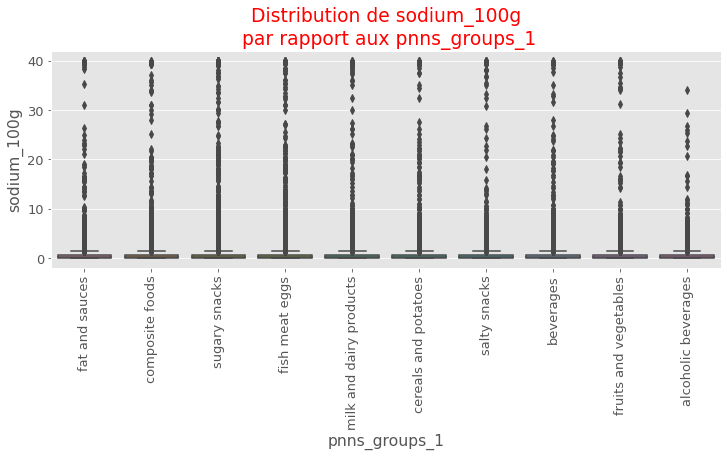

In [16]:
# Distribution de sodium_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_1", y = "sodium_100g", showfliers = True, data = data_france[data_france["pnns_groups_1"] != "unknown"])
plt.xlabel("pnns_groups_1")
plt.ylabel("sodium_100g")
plt.title("Distribution de sodium_100g" "\n par rapport aux pnns_groups_1", color = "red")
plt.xticks(rotation = 90);
plt.show();

### Distribution des variables nutritionnelles" par catégories pnns_groups_2"

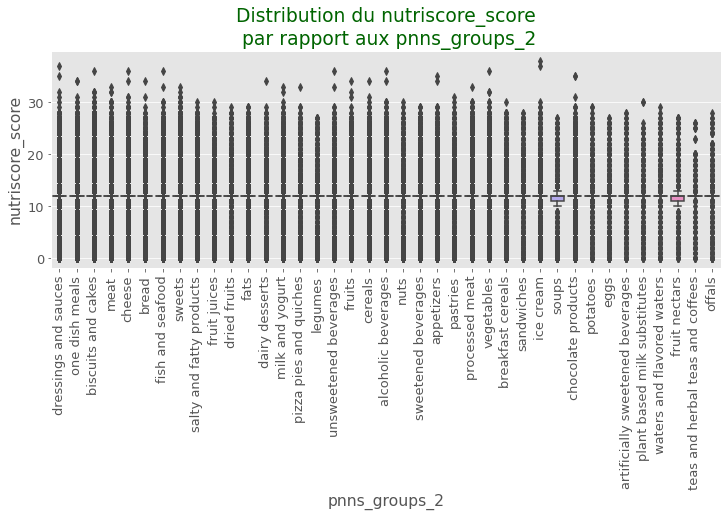

In [17]:
# Distribution du nutriscore par rapport aux pnns_groups_2
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="pnns_groups_2", y= "nutriscore_score",showfliers = True, data=data_france[data_france["pnns_groups_2"]!="unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("nutriscore_score")
plt.title("Distribution du nutriscore_score" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

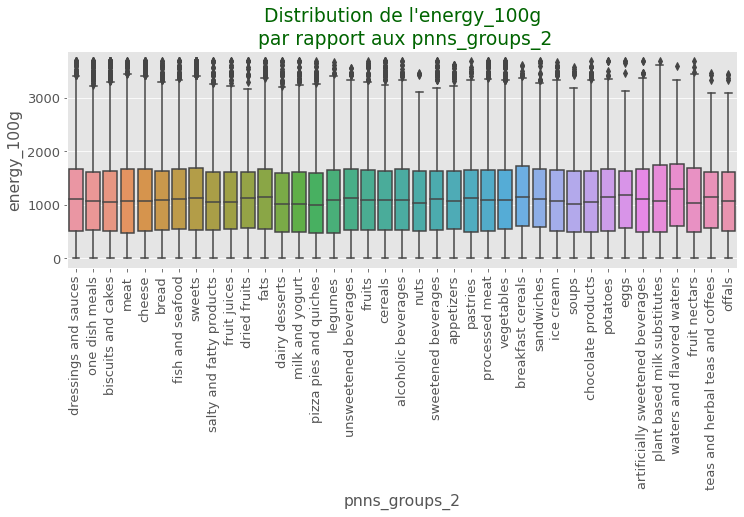

In [18]:
# Distribution de l'energy_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_2", y = "energy_100g", showfliers = True, data = data_france[data_france["pnns_groups_2"] != "unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("energy_100g")
plt.title("Distribution de l'energy_100g" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

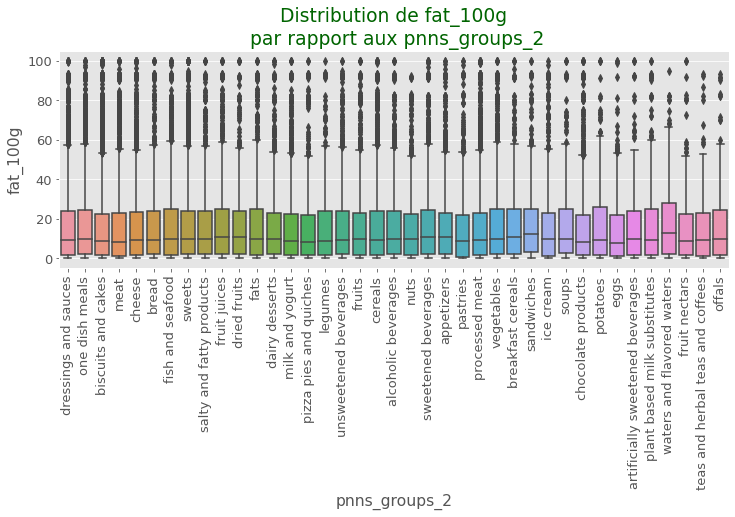

In [19]:
# Distribution de fat_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_2", y = "fat_100g", showfliers = True, data = data_france[data_france["pnns_groups_2"] != "unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("fat_100g")
plt.title("Distribution de fat_100g" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

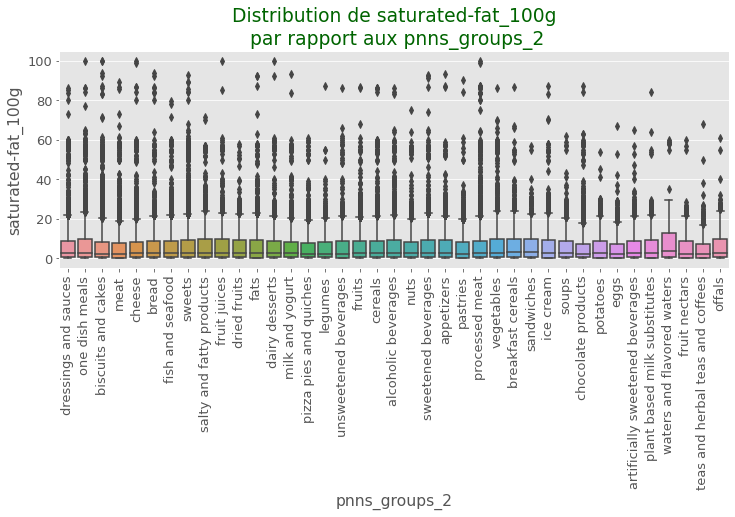

In [20]:
# Distribution de saturated-fat_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_2", y = "saturated-fat_100g", showfliers = True, data = data_france[data_france["pnns_groups_2"] != "unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("saturated-fat_100g")
plt.title("Distribution de saturated-fat_100g" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

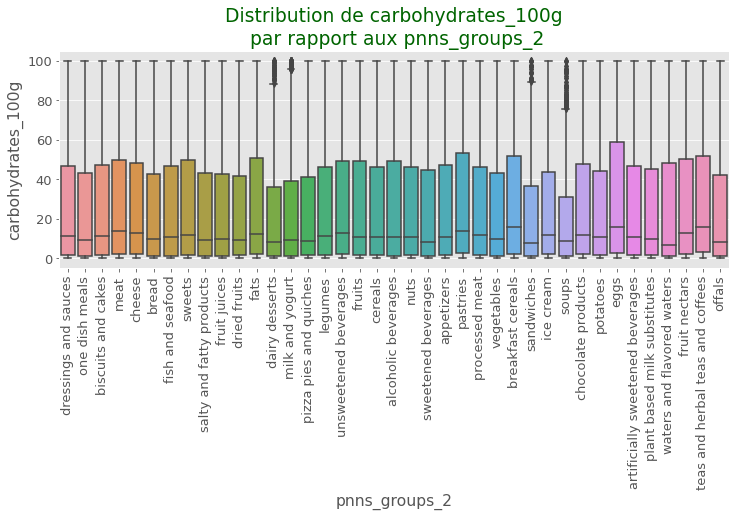

In [21]:
# Distribution de carbohydrates_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_2", y = "carbohydrates_100g", showfliers = True, data =data_france[data_france["pnns_groups_2"] != "unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("carbohydrates_100g")
plt.title("Distribution de carbohydrates_100g" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

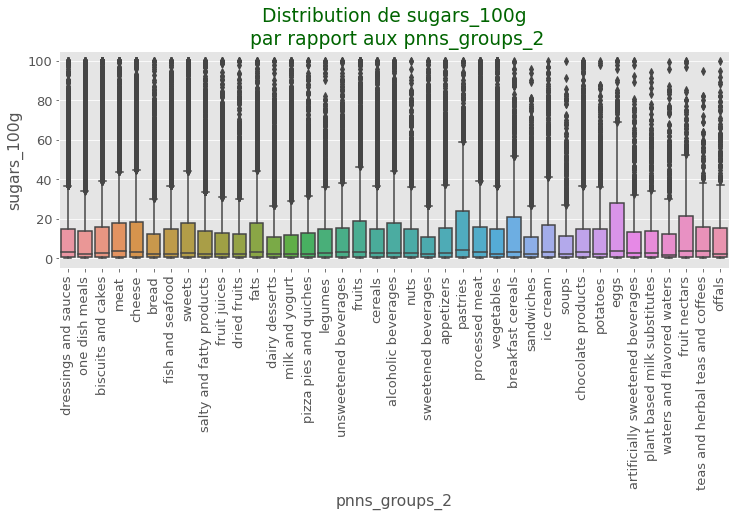

In [22]:
# Distribution de sugars_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_2", y = "sugars_100g", showfliers = True, data = data_france[data_france["pnns_groups_2"] != "unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("sugars_100g")
plt.title("Distribution de sugars_100g" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

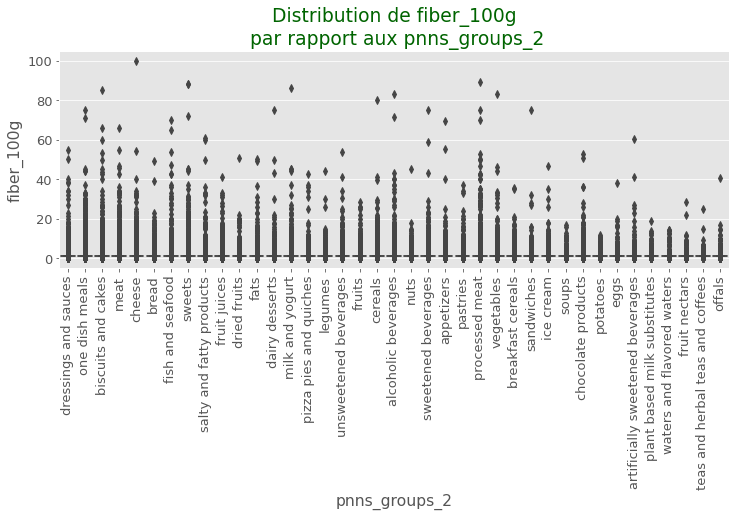

In [23]:
# Distribution de fiber_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_2", y = "fiber_100g", showfliers = True, data = data_france[data_france["pnns_groups_2"] != "unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("fiber_100g")
plt.title("Distribution de fiber_100g" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

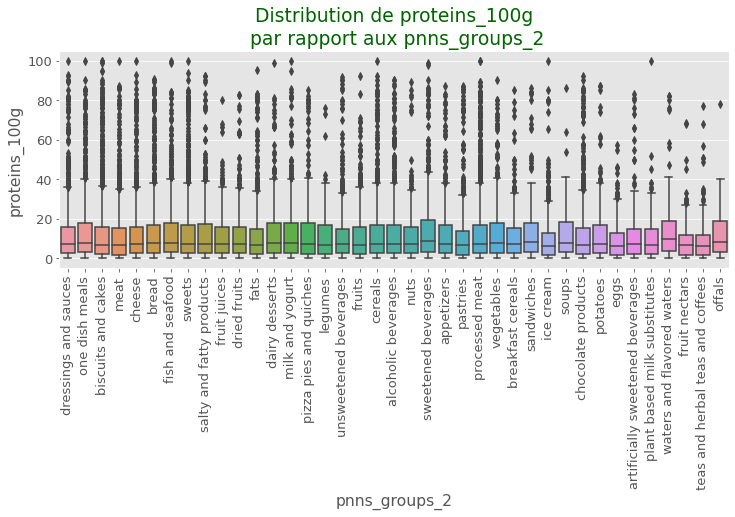

In [24]:
# Distribution de proteins_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_2", y = "proteins_100g", showfliers = True, data = data_france[data_france["pnns_groups_2"] != "unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("proteins_100g")
plt.title("Distribution de proteins_100g" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

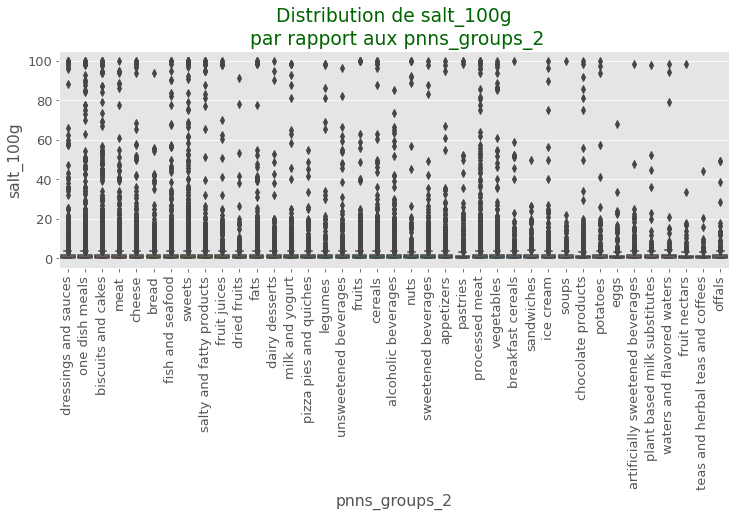

In [25]:
# Distribution de salt_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_2", y = "salt_100g", showfliers = True, data = data_france[data_france["pnns_groups_2"] != "unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("salt_100g")
plt.title("Distribution de salt_100g" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

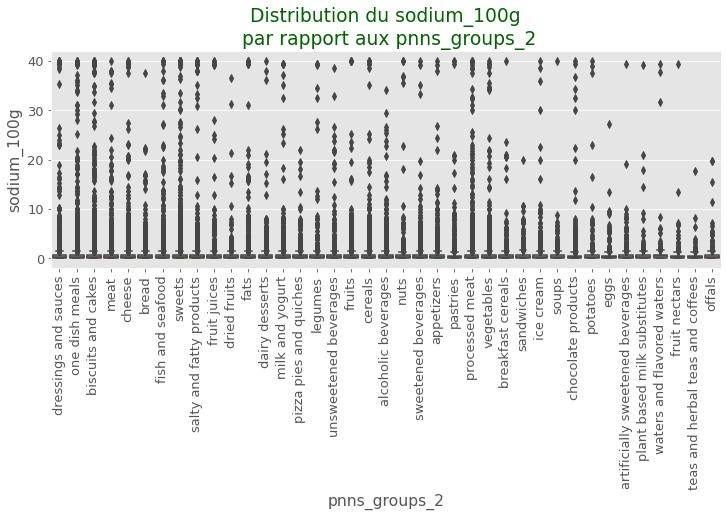

In [26]:
# Distribution de sodium_100g par rapport aux pnns_groups_1
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x = "pnns_groups_2", y = "sodium_100g", showfliers = True, data = data_france[data_france["pnns_groups_2"] != "unknown"])
plt.xlabel("pnns_groups_2")
plt.ylabel("sodium_100g")
plt.title("Distribution du sodium_100g" "\n par rapport aux pnns_groups_2", color = "darkgreen")
plt.xticks(rotation = 90);
plt.show();

### Distribution des variables nutritionnelles en fonction du nutrigrade

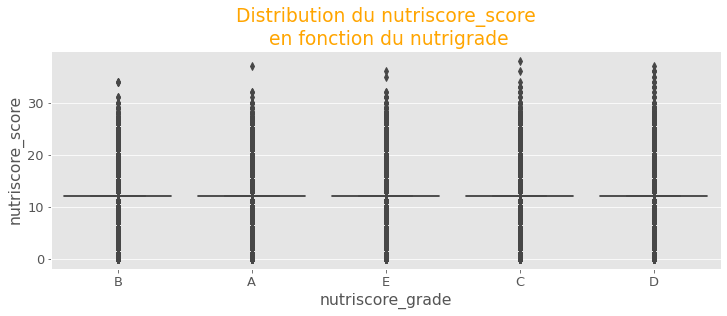

In [27]:
# Distribution du nutriscore en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "nutriscore_score",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("nutriscore_score")
plt.title("Distribution du nutriscore_score" "\n en fonction du nutrigrade", color = "orange")
plt.show();

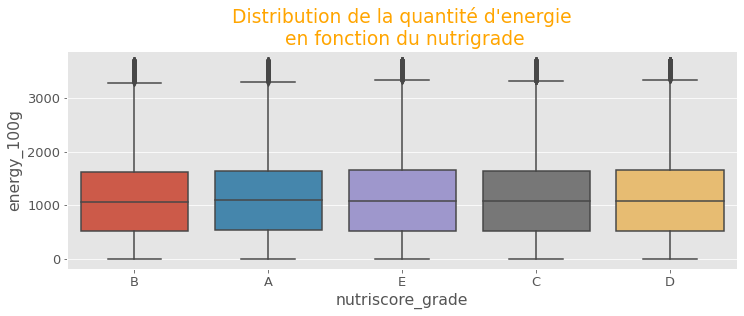

In [28]:
# Distribution de la quantité d'energie en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "energy_100g",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("energy_100g")
plt.title("Distribution de la quantité d'energie" "\n en fonction du nutrigrade", color = "orange")
plt.show();

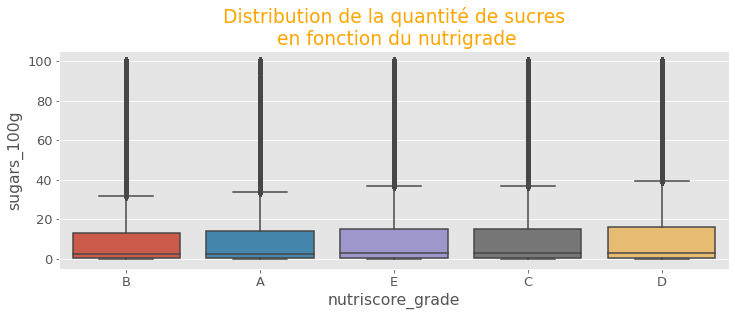

In [29]:
# Distribution de la quantité de sucres en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "sugars_100g",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("sugars_100g")
plt.title("Distribution de la quantité de sucres" "\n en fonction du nutrigrade", color = "orange")
plt.show();

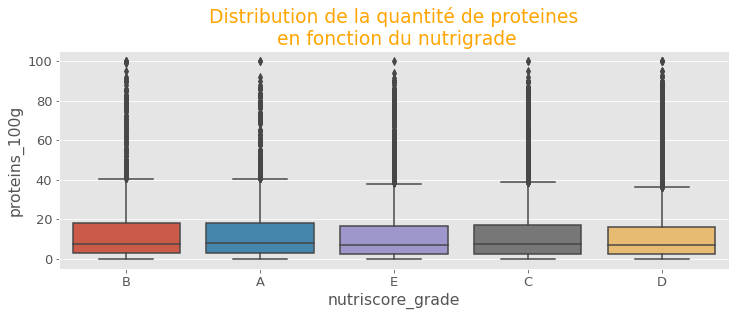

In [30]:
# Distribution de la quantité de proteines en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "proteins_100g",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("proteins_100g")
plt.title("Distribution de la quantité de proteines" "\n en fonction du nutrigrade", color = "orange")
plt.show();

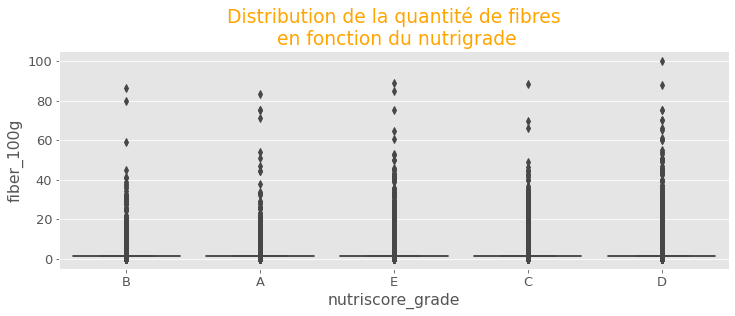

In [31]:
# Distribution de la quantité de fibres en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "fiber_100g",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("fiber_100g")
plt.title("Distribution de la quantité de fibres" "\n en fonction du nutrigrade", color = "orange")
plt.show();

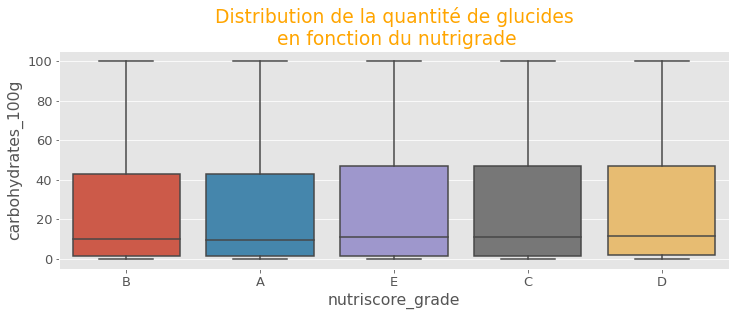

In [32]:
# Distribution de la quantité de glucides en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "carbohydrates_100g",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("carbohydrates_100g")
plt.title("Distribution de la quantité de glucides" "\n en fonction du nutrigrade", color = "orange")
plt.show();

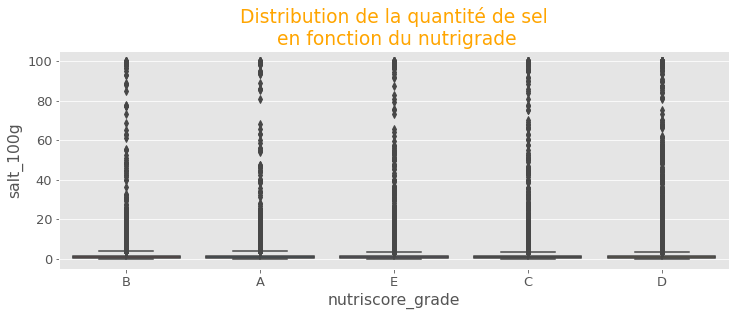

In [33]:
# Distribution de la quantité de sel en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "salt_100g",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("salt_100g")
plt.title("Distribution de la quantité de sel" "\n en fonction du nutrigrade", color = "orange")
plt.show();

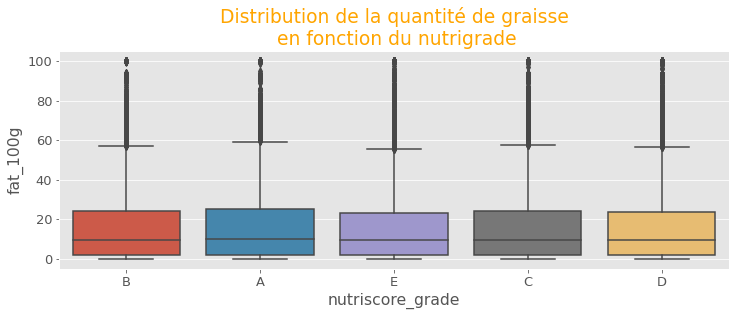

In [34]:
# Distribution de la quantité de graisse en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "fat_100g",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("fat_100g")
plt.title("Distribution de la quantité de graisse" "\n en fonction du nutrigrade", color = "orange")
plt.show();

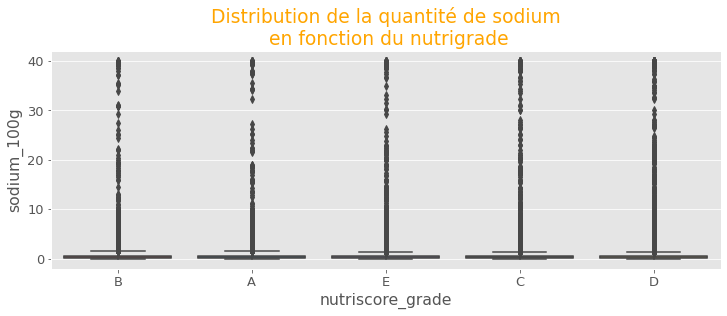

In [35]:
# Distribution de la quantité de sodium en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "sodium_100g",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("sodium_100g")
plt.title("Distribution de la quantité de sodium" "\n en fonction du nutrigrade", color = "orange")
plt.show();

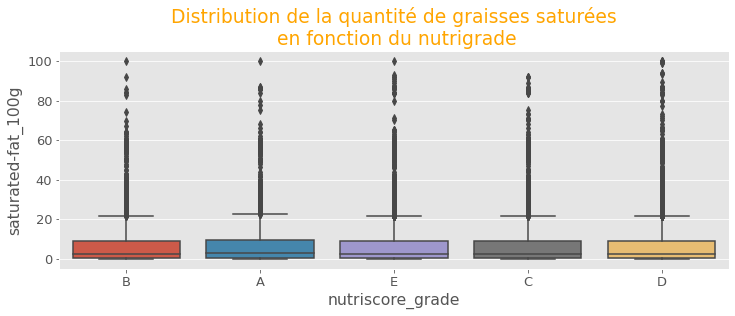

In [36]:
# Distribution de la quantité de graisses saturées en fonction du nutrigrade
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.boxplot(x="nutriscore_grade", y= "saturated-fat_100g",showfliers = True, data=data_france, 
            order = data_france["nutriscore_grade"].value_counts(ascending=True).index )
plt.xlabel("nutriscore_grade")
plt.ylabel("saturated-fat_100g")
plt.title("Distribution de la quantité de graisses saturées" "\n en fonction du nutrigrade", color = "orange")
plt.show();

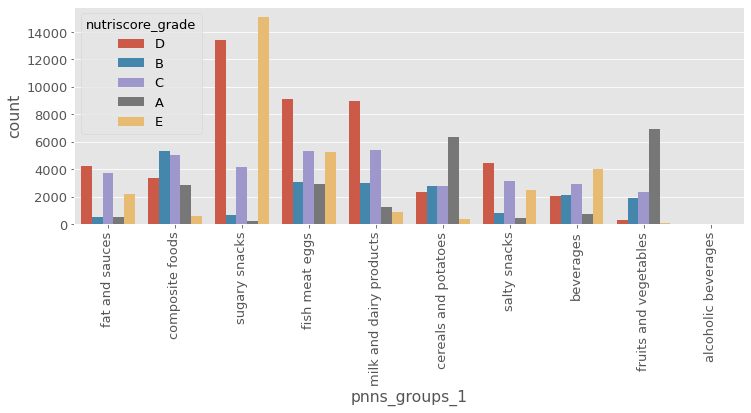

In [37]:
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(12,4))
sns.countplot(x= "pnns_groups_1", hue = "nutriscore_grade", data = data_france)
plt.xticks(rotation=90);

In [38]:
# Hypothèses
# Ho : Le nutrigrade est indépendant de la catégorie de produit
# Ha : Le nutrigrade dépend de la catégorie de produit 

In [39]:
# Tableau de contégence entre les variables "nutriscore_grade" et "pnns_groups_1"
# on utile le modèle stats
cont_table = pd.crosstab(data_france["pnns_groups_1"], data_france["nutriscore_grade"])
cont_table

nutriscore_grade,A,B,C,D,E
pnns_groups_1,,,,,
alcoholic beverages,0,1,1,2,2
beverages,749,2110,2910,2022,3997
cereals and potatoes,6375,2758,2763,2366,336
composite foods,2816,5314,5047,3382,574
fat and sauces,488,487,3696,4200,2178
fish meat eggs,2933,3101,5298,9138,5226
fruits and vegetables,6944,1884,2330,305,46
milk and dairy products,1258,2974,5378,8993,870
salty snacks,472,812,3141,4424,2467


In [40]:
# Test du chi2
stats.chi2_contingency(cont_table, correction = True)

(75375.50101303638,
 0.0,
 36,
 array([[8.55785871e-01, 7.71795562e-01, 1.33411529e+00, 1.85420913e+00,
         1.18409414e+00],
        [1.68133397e+03, 1.51632101e+03, 2.62109185e+03, 3.64290287e+03,
         2.32635029e+03],
        [2.08212702e+03, 1.87777860e+03, 3.24590251e+03, 4.51129081e+03,
         2.88090105e+03],
        [2.44369655e+03, 2.20386223e+03, 3.80956622e+03, 5.29469417e+03,
         3.38118083e+03],
        [1.57592968e+03, 1.42126153e+03, 2.45677331e+03, 3.41452611e+03,
         2.18050936e+03],
        [3.66504562e+03, 3.30534313e+03, 5.71357110e+03, 7.94095963e+03,
         5.07108052e+03],
        [1.64153993e+03, 1.48043252e+03, 2.55905549e+03, 3.55668215e+03,
         2.27128992e+03],
        [2.77745304e+03, 2.50486250e+03, 4.32987119e+03, 6.01783573e+03,
         3.84297754e+03],
        [1.61401215e+03, 1.45560643e+03, 2.51614145e+03, 3.49703842e+03,
         2.23320155e+03],
        [4.77100623e+03, 4.30276026e+03, 7.43769277e+03, 1.03372159e+04,
     

On a le p value qui est < 0.05 donc on peut rejetter l'hypothèse nulle que le nutrigrade est indépendant de la catégorie de produit

### Distribution de chacune de nos variables quantitatives.

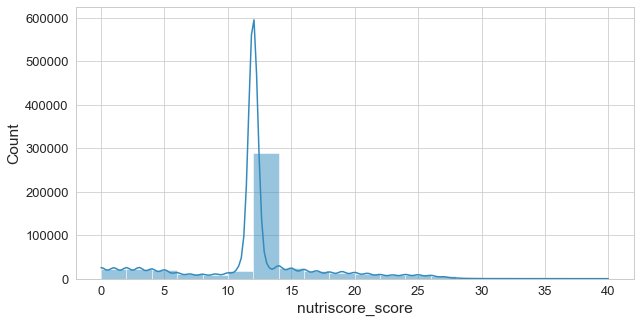

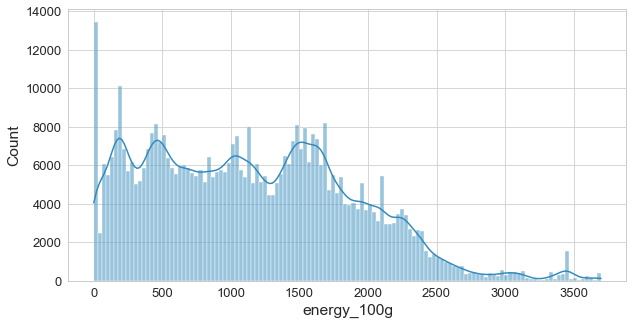

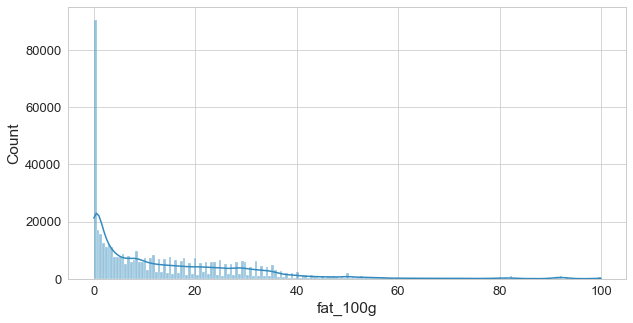

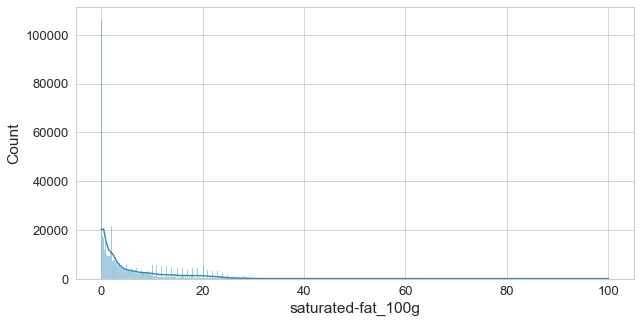

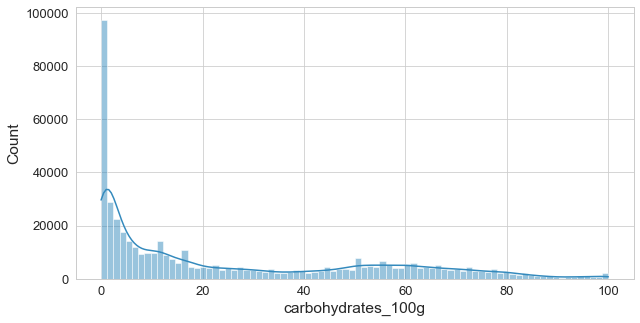

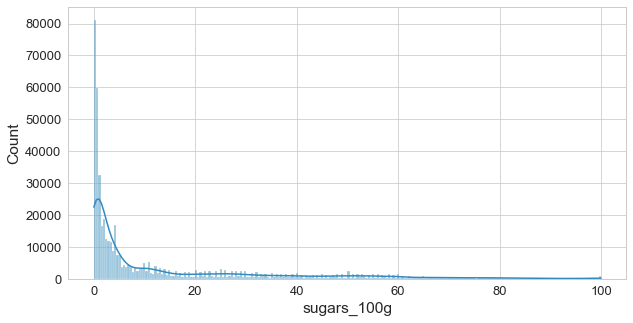

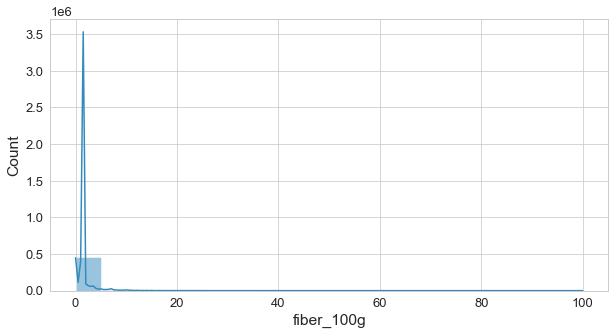

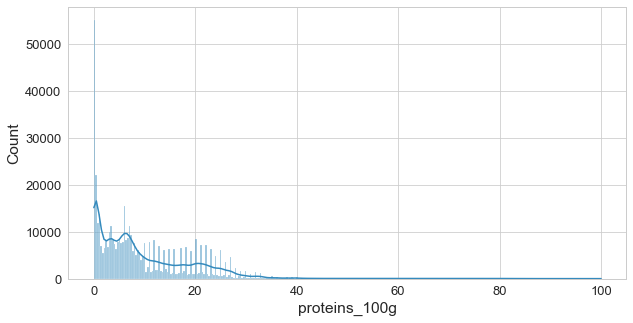

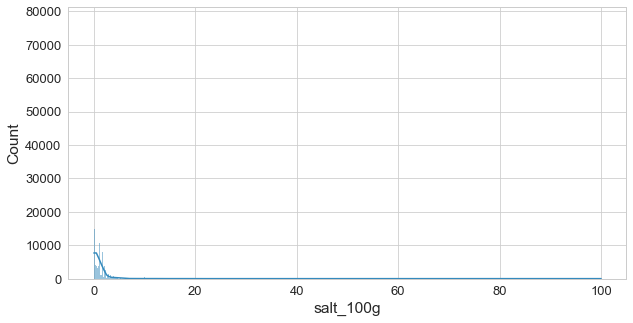

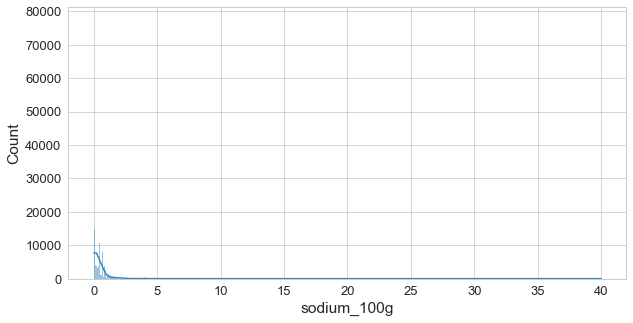

In [41]:
# On va générer des histogrammes pour évaluer la distribution de chacune de nos variables quantitatives.
for var in data_france.columns:
    if df_final[var].dtypes == 'float64':
        plt.rcParams.update({ "font.size" : 13})
        sns.set_style("whitegrid")
        plt.figure(figsize=(10,5))
        sns.histplot(x=var, data=data_france, kde=True)
        plt.show()

## Visualisons la distribution des macronutriments qui sont les proteines,glucides et lipides dans notre échantillon 

### Distribution des proteines dans notre échantillon

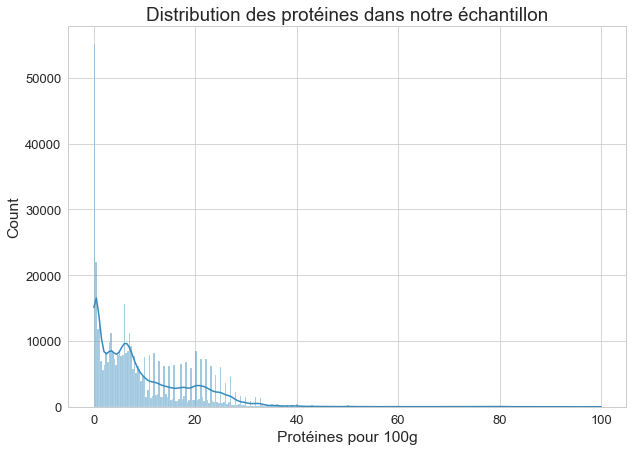

In [42]:
plt.figure(figsize=(10,7))
sns.histplot(x="proteins_100g", data=data_france, kde=True)
plt.title('Distribution des protéines dans notre échantillon')
plt.xlabel("Protéines pour 100g")
plt.show()

### Distribution des glucides dans notre échantillon

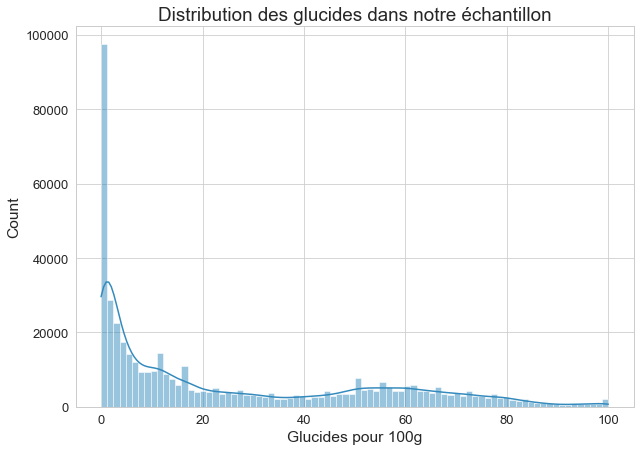

In [43]:
plt.figure(figsize=(10,7))
sns.histplot(x="carbohydrates_100g", data=data_france, kde=True)
plt.title('Distribution des glucides dans notre échantillon')
plt.xlabel("Glucides pour 100g")
plt.show()

### Distribution des lipides dans notre échantillon

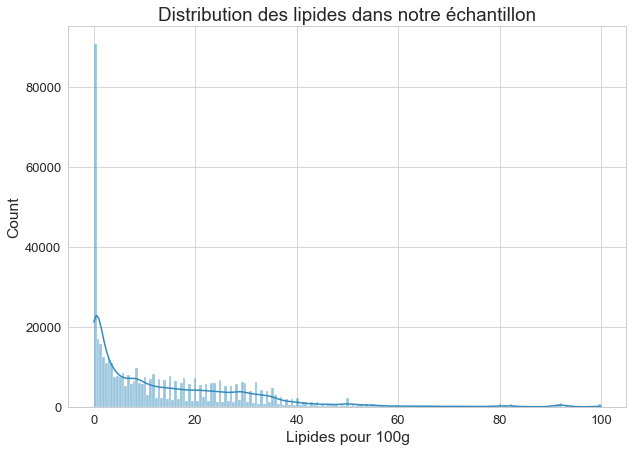

In [44]:
plt.figure(figsize=(10,7))
sns.histplot(x="fat_100g", data=data_france, kde=True)
plt.title('Distribution des lipides dans notre échantillon')
plt.xlabel("Lipides pour 100g")
plt.show()

### Test des normalité et d'homogéneité des variables data_france

In [45]:
import pingouin as pg
pg.normality(data_france, method='normaltest', alpha=0.05)

,W,pval,normal
nutriscore_score,16658.994316,0.0,False
energy_100g,16926.761857,0.0,False
fat_100g,175444.736699,0.0,False
saturated-fat_100g,291257.768949,0.0,False
carbohydrates_100g,61268.145169,0.0,False
sugars_100g,166585.917434,0.0,False
fiber_100g,858786.091815,0.0,False
proteins_100g,231974.496811,0.0,False
salt_100g,925048.518530,0.0,False
sodium_100g,925047.079354,0.0,False


In [46]:
#Le choix s'est porté sur un test de Levene car il est plus efficace lorsque les distributions ne suivent pas une loi normale. 
#Dans le cas contraire, nous aurions utilisé un test de Bartlett.
pg.homoscedasticity(data_france, method='levene', alpha=0.05)

,W,pval,equal_var
levene,0.324783,1.0,True


### Test ANOVA : Analyse unidirectionnelle de la variance

In [47]:
pg.anova(data=data_france,dv= "fat_100g",between = "pnns_groups_1")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_1,9,194292,6.836169,6.832517e-10,0.000317


In [48]:
pg.anova(data=data_france,dv= "sugars_100g",between = "pnns_groups_1")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_1,9,194292,13.720164,2.631445e-22,0.000635


In [49]:
pg.anova(data=data_france,dv= "energy_100g",between = "pnns_groups_1")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_1,9,194292,4.852183,0.000002,0.000225


In [50]:
pg.anova(data=data_france,dv= "carbohydrates_100g",between = "pnns_groups_1")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_1,9,194292,22.12037,5.407202e-38,0.001024


In [51]:
pg.anova(data=data_france,dv= "proteins_100g",between = "pnns_groups_1")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_1,9,194292,14.325223,2.008960e-23,0.000663


In [52]:
pg.anova(data=data_france,dv= "sodium_100g",between = "pnns_groups_1")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_1,9,194292,2.338528,0.012448,0.000108


In [53]:
pg.anova(data=data_france,dv= "fiber_100g",between = "pnns_groups_1")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_1,9,194292,8.558072,6.333142e-13,0.000396


## Analyse bivariée des variables 

### Relations entre nos variables quantitatives

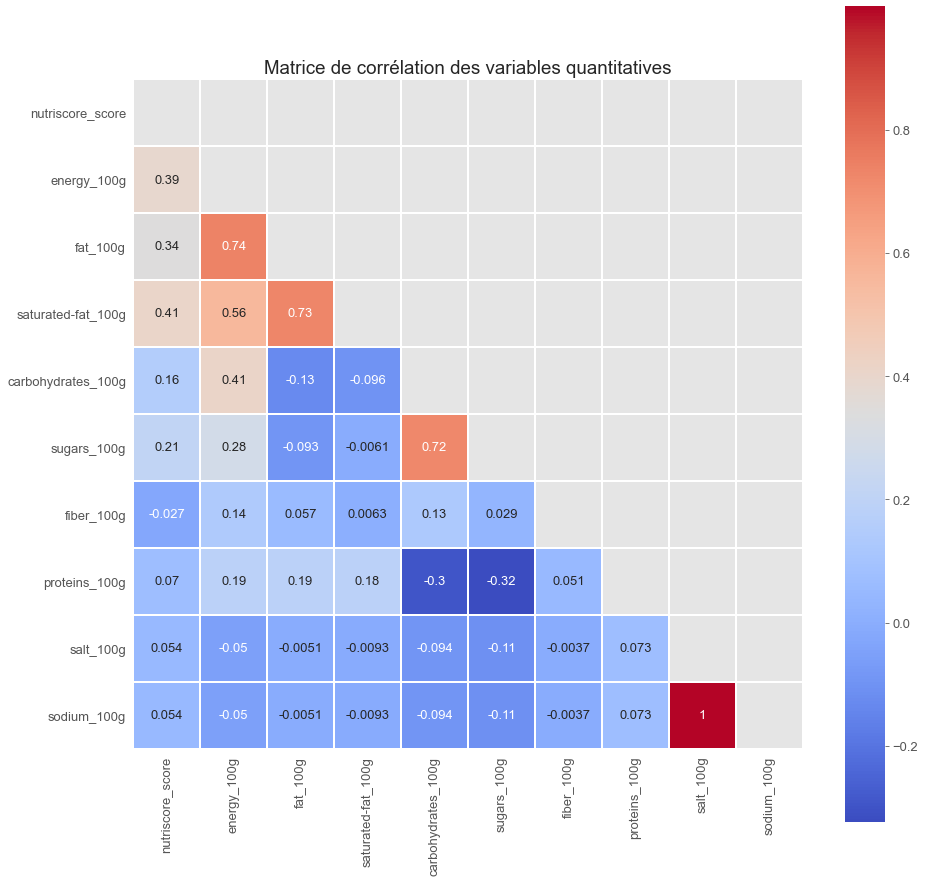

In [54]:
# Correlation entre les variables numeriques (quantitives)
corr_matrix = data_france.corr()
mask = np.triu(corr_matrix)

plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

### Regression lineaire entre les variables numeriques (quantitatives)

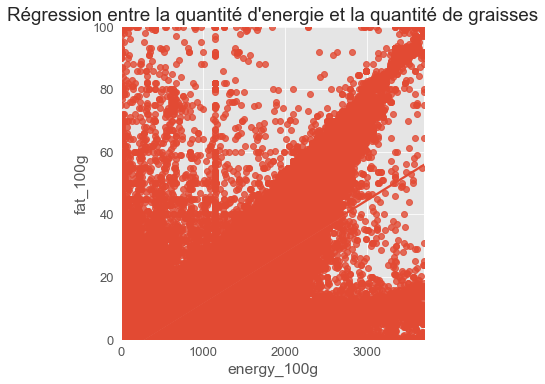

In [55]:
#Energie en KJ et quantité de graisses pour 100g
sns.lmplot(x="energy_100g", y="fat_100g", data=data_france)
plt.title("Régression entre la quantité d'energie et la quantité de graisses")
plt.xlim(data_france["energy_100g"].min(), data_france["energy_100g"].max())
plt.ylim(data_france["fat_100g"].min(), data_france["fat_100g"].max())
plt.show()

In [56]:
pg.linear_regression(X=data_france["energy_100g"], y=data_france["fat_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-4.221327,0.029132,-144.901923,0.0,0.54816,0.548159,-4.278426,-4.164229
1,energy_100g,0.016262,0.000021,763.625692,0.0,0.54816,0.548159,0.016220,0.016304


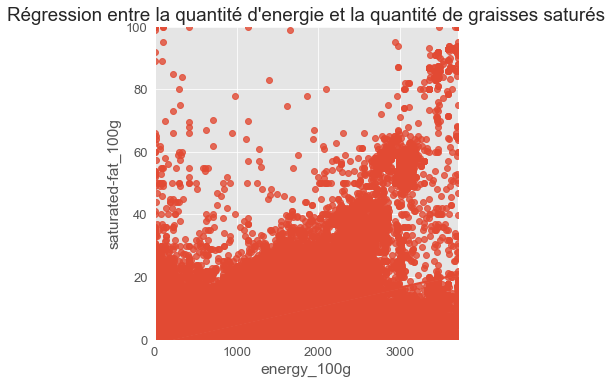

In [57]:
#Energie en KJ et quantité de graisses saturés pour 100g
sns.lmplot(x="energy_100g", y="saturated-fat_100g", data=data_france)
plt.title("Régression entre la quantité d'energie et la quantité de graisses saturés")
plt.xlim(data_france["energy_100g"].min(), data_france["energy_100g"].max())
plt.ylim(data_france["saturated-fat_100g"].min(), data_france["saturated-fat_100g"].max())
plt.show()

In [58]:
pg.linear_regression(X=data_france["energy_100g"], y=data_france["saturated-fat_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.035742,0.017427,-59.434860,0.0,0.308915,0.308913,-1.069898,-1.001587
1,energy_100g,0.005905,0.000013,463.524497,0.0,0.308915,0.308913,0.005880,0.005930


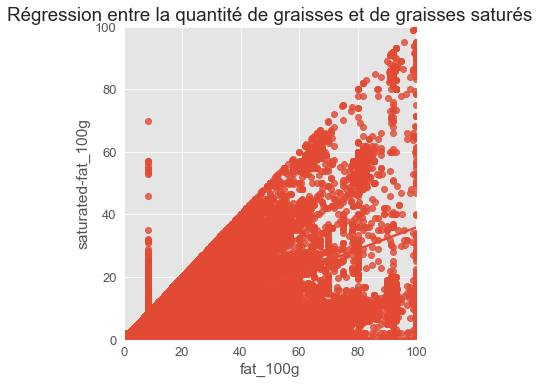

In [59]:
#Quantité de graisses et de graisses saturés pour 100g
sns.lmplot(x="fat_100g", y="saturated-fat_100g", data=data_france)
plt.title("Régression entre la quantité de graisses et de graisses saturés")
plt.xlim(data_france["fat_100g"].min(), data_france["fat_100g"].max())
plt.ylim(data_france["saturated-fat_100g"].min(), data_france["saturated-fat_100g"].max())
plt.show()

In [60]:
pg.linear_regression(X=data_france["fat_100g"], y=data_france["saturated-fat_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.658645,0.010426,63.173156,0.0,0.529427,0.529426,0.638211,0.679080
1,fat_100g,0.351937,0.000479,735.375056,0.0,0.529427,0.529426,0.350999,0.352875


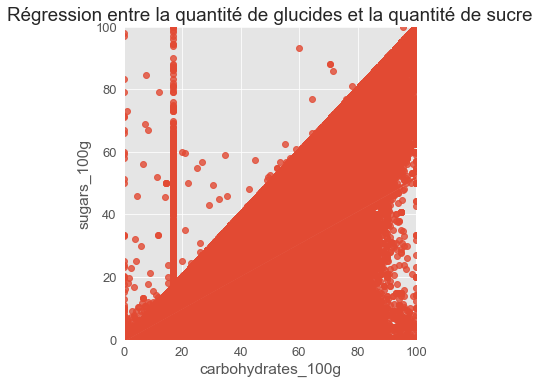

In [61]:
#Quantité de glucides  et quantité de sucre pour 100g
sns.lmplot(x="carbohydrates_100g", y="sugars_100g", data=data_france)
plt.title("Régression entre la quantité de glucides et la quantité de sucre")
plt.xlim(data_france["carbohydrates_100g"].min(), data_france["carbohydrates_100g"].max())
plt.ylim(data_france["sugars_100g"].min(),data_france["sugars_100g"].max())
plt.show()

In [62]:
pg.linear_regression(X=data_france["carbohydrates_100g"], y=data_france["sugars_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.254306,0.02707,-9.394396,5.778608e-21,0.520514,0.520513,-0.307363,-0.201250
1,carbohydrates_100g,0.520320,0.00072,722.349654,0.000000e+00,0.520514,0.520513,0.518908,0.521731


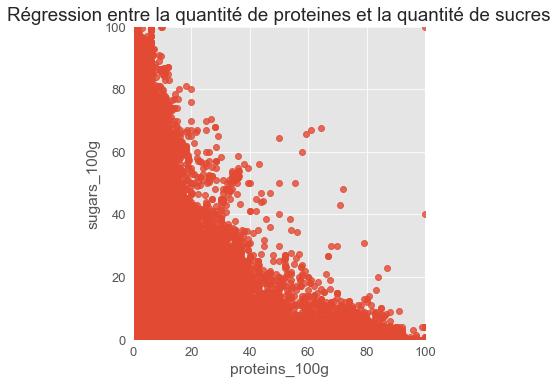

In [63]:
#Quantité de proteines et quantité de sucre pour 100g
sns.lmplot(x="proteins_100g", y="sugars_100g", data=data_france)
plt.title("Régression entre la quantité de proteines et la quantité de sucres")
plt.xlim(data_france["proteins_100g"].min(), data_france["proteins_100g"].max())
plt.ylim(data_france["sugars_100g"].min(), data_france["sugars_100g"].max())
plt.show()

In [64]:
pg.linear_regression(X=data_france["proteins_100g"], y=data_france["sugars_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,19.334963,0.037578,514.525608,0.0,0.104112,0.104111,19.261311,19.408615
1,proteins_100g,-0.641542,0.002714,-236.343461,0.0,0.104112,0.104111,-0.646863,-0.636222


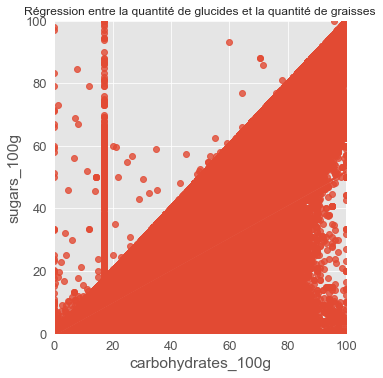

In [65]:
#Quantité de glucides et quantité de sucre pour 100g
sns.lmplot(x="carbohydrates_100g", y="sugars_100g",palette="Set1", data=data_france)
sns.set_theme(color_codes=True)
plt.title("Régression entre la quantité de glucides et la quantité de graisses")
plt.xlim(data_france["carbohydrates_100g"].min(),data_france["carbohydrates_100g"].max())
plt.ylim(data_france["sugars_100g"].min(), data_france["sugars_100g"].max())
plt.show()

In [66]:
pg.linear_regression(X=data_france["carbohydrates_100g"], y=data_france["sugars_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.254306,0.02707,-9.394396,5.778608e-21,0.520514,0.520513,-0.307363,-0.201250
1,carbohydrates_100g,0.520320,0.00072,722.349654,0.000000e+00,0.520514,0.520513,0.518908,0.521731


## Reduction de dimensions

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math 

In [68]:
n_comp = 2
scaler = StandardScaler()
pca = PCA(n_components=n_comp)

data = data_france[["fat_100g","sugars_100g", "carbohydrates_100g",
                'proteins_100g', 'sodium_100g', "fiber_100g","energy_100g"]]

X = data.values
features = data.columns
X_scaled = scaler.fit_transform(X)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_

In [69]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Ajoutez un cercle d'unité pour l'échelle
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

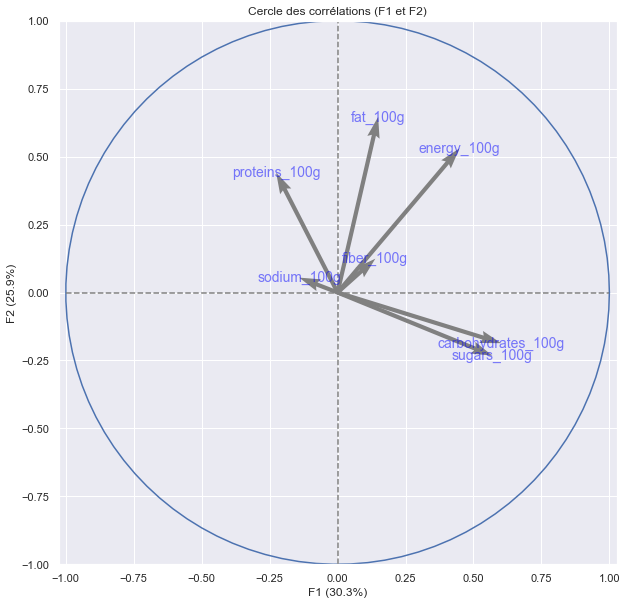

In [70]:
# Appel à la fonction
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

## Apprentissage non-supervisée

In [71]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.style import set_palette
set_palette('sns_pastel')

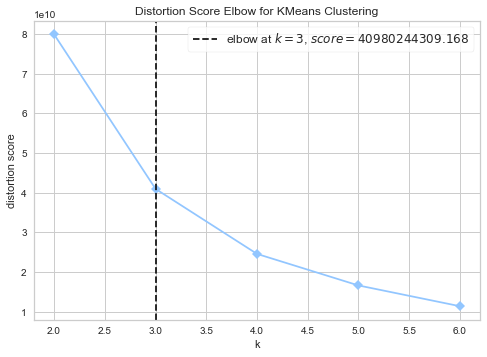

In [72]:
# Instancier le modèle de clustering et le visualiseur
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7), metric='distortion', timings=False)

visualizer.fit(X)        # Adapter les données au visualiseur
visualizer.show();      # Finaliser et rendre la figure

In [73]:
# paramétrage de la palette de couleurs Seaborn
sns.set_theme(style="ticks", palette="Pastel2")

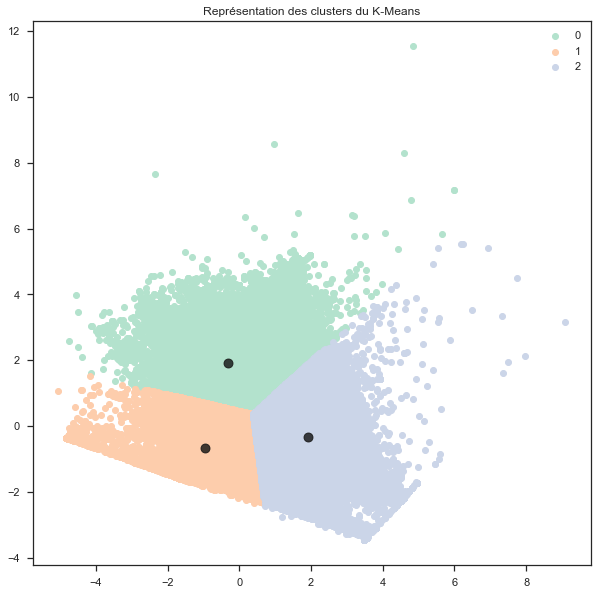

In [74]:
model = km = KMeans(n_clusters=3)

#Prédiction
label = km.fit_predict(pca_components)
 
centroids = km.cluster_centers_
u_labels = np.unique(label)

#Représentation graphique:

plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(pca_components[label == i , 0] , pca_components[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
#plt.savefig("Présentation/Images/representation_kmeans.png")
plt.show()